In [4]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# WordCloud
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [3]:
data = pd.read_csv(r"C:\Users\HP\Desktop\college\sem 6\NLP\spam.csv")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
## Removing unnamed columns

In [5]:
data = data.iloc[:,:2]

In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [9]:
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

<AxesSubplot:>

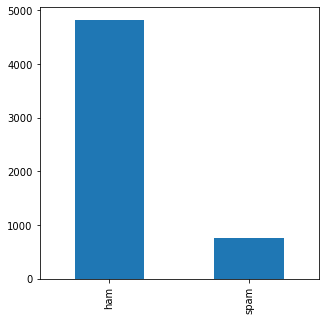

In [12]:
data['v1'].value_counts().plot(kind='bar',figsize=(5,5))

In [13]:
# imbalanced dataset with the ratio of - 1:4825/747

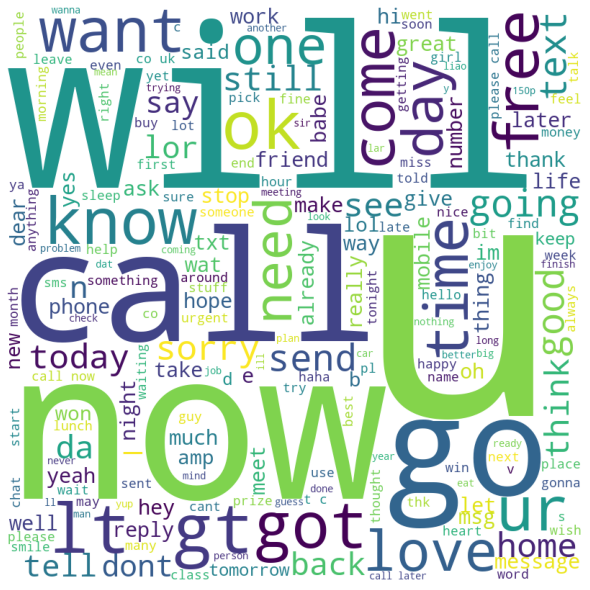

In [33]:
# WordCloud

comment_words = ''
stopwords = set(STOPWORDS)

# iterate 
for val in data['v2']:
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [18]:
# Ham messages (non spam)

In [21]:
ham = data[data['v1']=='ham']
ham.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...


In [37]:
# Spam messages

In [23]:
spam = data[data['v1']=='spam']
spam.head()

,v1,v2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [40]:
# Ham WorldCloud

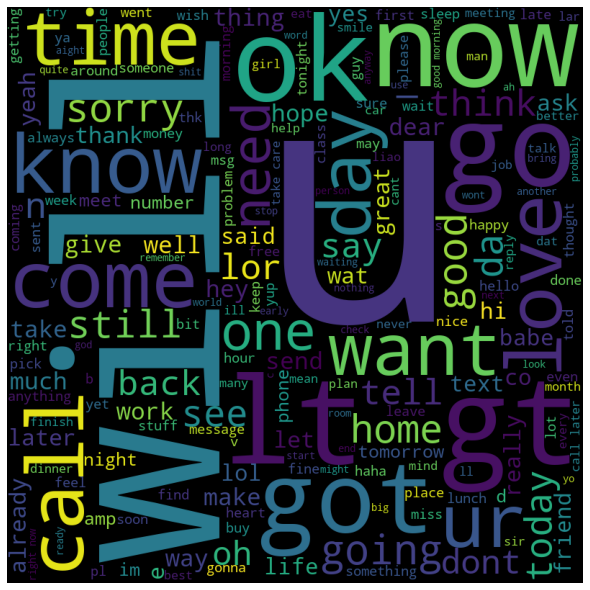

In [41]:
# WordCloud

ham_words = ''
stopwords = set(STOPWORDS)

# iterate 
for val in ham['v2']:
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    ham_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(ham_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [28]:
# Spam WorldCloud

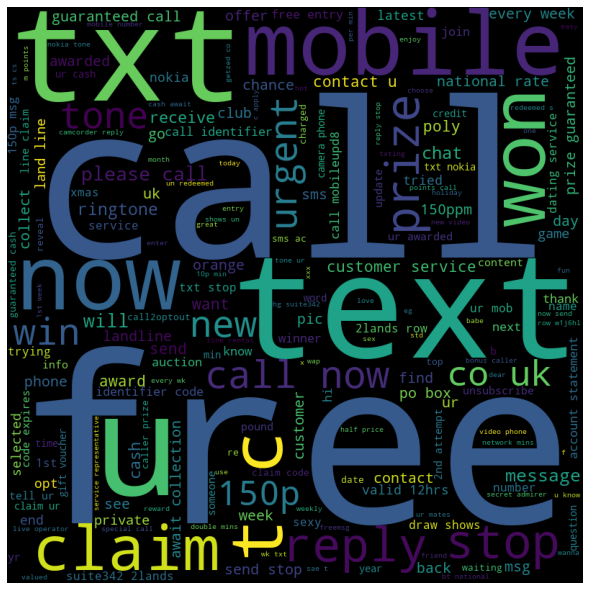

In [42]:
# WordCloud

spam_words = ''
stopwords = set(STOPWORDS)

# iterate 
for val in spam['v2']:
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    spam_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(spam_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [43]:
# Stemming

In [52]:
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [53]:
remove_words = list(stopwords.words('english'))+list(punctuation)
final_corpus = []

from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

for i in range(len(data)):
    word = word_tokenize(data['v2'][i].lower())
    word = [stemmer.stem(y) for y in word if y not in remove_words]
    j = " ".join(word)
    final_corpus.append(j)

In [54]:
# Vectorization

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

vector = tfidf.fit_transform(final_corpus)

print(type(vector))

X = vector.toarray()
y = data['v1']

<class 'scipy.sparse.csr.csr_matrix'>


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [60]:
# Models

In [61]:
## Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train , y_train)

pred1 = lr.predict(X_test)

from sklearn import metrics
metrics.confusion_matrix(pred1 , y_test)

array([[961,  55],
       [  4,  95]], dtype=int64)

In [78]:
print(metrics.classification_report(pred1 , y_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.97      1016
        spam       0.63      0.96      0.76        99

    accuracy                           0.95      1115
   macro avg       0.81      0.95      0.87      1115
weighted avg       0.96      0.95      0.95      1115



In [75]:
## SVC

In [81]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

pred2 = svc.predict(X_test)

print(metrics.classification_report(y_test, pred2))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       0.99      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [82]:
print(metrics.confusion_matrix(y_test, pred2))

[[964   1]
 [ 29 121]]


In [83]:
## Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0, max_features='auto')

tree.fit(X_train, y_train)

pred3 = tree.predict(X_test)

print(metrics.classification_report(y_test,pred3))

              precision    recall  f1-score   support

         ham       0.97      0.99      0.98       965
        spam       0.91      0.77      0.84       150

    accuracy                           0.96      1115
   macro avg       0.94      0.88      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [85]:
print(metrics.confusion_matrix(y_test,pred3))

[[954  11]
 [ 34 116]]


In [86]:
## RFC

In [87]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=5)

rfc.fit(X_train, y_train)

pred4 = rfc.predict(X_test)

print(metrics.classification_report(y_test, pred4))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.86      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [88]:
print(metrics.confusion_matrix(y_test, pred4))

[[965   0]
 [ 21 129]]


In [72]:
## AdaBoost

In [89]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=0, learning_rate=0.1)

ada.fit(X_train, y_train)

pred5 = ada.predict(X_test)

print(metrics.classification_report(y_test, pred5))

              precision    recall  f1-score   support

         ham       0.93      1.00      0.96       965
        spam       0.96      0.52      0.68       150

    accuracy                           0.93      1115
   macro avg       0.95      0.76      0.82      1115
weighted avg       0.93      0.93      0.92      1115



In [90]:
print(metrics.confusion_matrix(y_test, pred5))

[[962   3]
 [ 72  78]]
